In [35]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from Evaluation import output_metrics_name, output_path
from os.path import join

In [36]:
results = pd.read_csv(join(output_path, output_metrics_name))
results

,batch_roc_auc,stream_roc_auc,batch_avg_prec,stream_avg_prec
0,0.735256,0.737039,0.033339,0.042024
1,0.742068,0.731444,0.029340,0.031115
2,0.763531,0.761080,0.053710,0.044248
3,0.758542,0.744606,0.037996,0.046452
4,0.747285,0.739414,0.034191,0.029771
5,0.658701,0.625618,0.000781,0.000715
6,0.647596,0.645081,0.001081,0.000912
7,0.626333,0.602210,0.000675,0.000445
8,0.636436,0.576162,0.000672,0.000499
9,0.622693,0.592197,0.000790,0.000875


In [37]:
results[['batch_roc_auc','stream_roc_auc','batch_avg_prec','stream_avg_prec']].describe()

,batch_roc_auc,stream_roc_auc,batch_avg_prec,stream_avg_prec
count,45.000000,45.000000,45.000000,45.000000
mean,0.684463,0.686391,0.014435,0.011806
std,0.075797,0.069812,0.017680,0.013258
min,0.579770,0.524461,0.000410,0.000339
25%,0.622693,0.637132,0.000927,0.001099
50%,0.658701,0.680292,0.006047,0.008541
75%,0.747285,0.745231,0.033339,0.020107
max,0.819810,0.791143,0.059432,0.046452


Paired T Test dla obszarów pod krzywą charakterystyki roboczej odbiornika (roc_auc)

Sprawdzenie czy nie ma obserwacji odstających (ang. outliers)

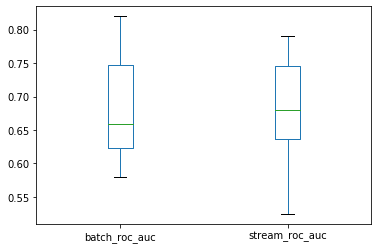

In [38]:
results[['batch_roc_auc', 'stream_roc_auc']].plot(kind='box')

Nie ma obserwacji odstających

Sprawdzenie czy dane mają rozkład normalny, ponieważ wymaga tego test paired t-test

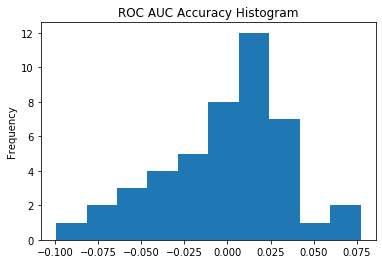

In [39]:
results['difference_roc_auc'] = results['batch_roc_auc'] - results['stream_roc_auc']
results['difference_roc_auc'].plot(kind='hist', title= 'ROC AUC Accuracy Histogram')

Text(0.5, 1.0, 'ROC AUC Difference Q-Q Plot')

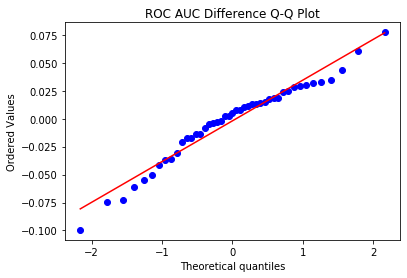

In [40]:
stats.probplot(results['difference_roc_auc'], plot= plt)
plt.title('ROC AUC Difference Q-Q Plot')

In [41]:
stats.shapiro(results['difference_roc_auc'])

(0.9645327925682068, 0.18157151341438293)

Hipoteza zerowa -> populacja ma rozkład normalny.
Hipoteza alternatynwna -> populacja nie ma rozkładu normalnego
Dla pvalue (0.18157151341438293) > alpha_level (0.05) hipoteza zerowa nie może zostać odrzucona. Dane mają rozkład normalny.

Nasze dane mają rozkład normalny więc przechodzimy do Paired T Test

In [42]:
stats.ttest_rel(results['batch_roc_auc'], results['stream_roc_auc'])

Ttest_relResult(statistic=-0.35798944884706857, pvalue=0.7220629490516326)

Hipoteza zerowa -> średnia różnica pomiędzy batch_roc_auc a stream_roc_auc jest równa 0.
Hipoteza alternatywna ->  średnia różnica pomiędzy batch_roc_auc a stream_roc_auc jest różna od 0.
Dla pvalue (0.7220629490516326) > alpha level (0.05) hipoteza zerowa nie może zostać odrzucona. Dane są więc statystycznie nieznaczące.

Powtórzenie powyższych kroków dla średniej precyzji (avg_prec)

Sprawdzenie czy nie ma obserwacji odstających (ang. outliers)

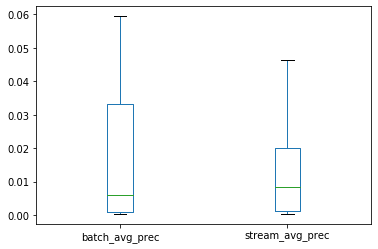

In [43]:
results[['batch_avg_prec', 'stream_avg_prec']].plot(kind='box')

Nie ma obserwacji odstających

Sprawdzenie czy dane mają rozkład normalny, ponieważ wymaga tego test paired t-test

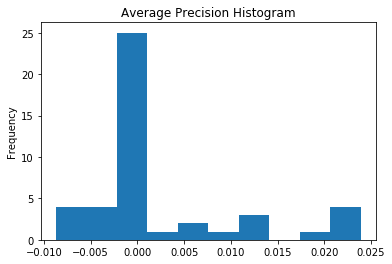

In [44]:
results['difference_avg_prec'] = results['batch_avg_prec'] - results['stream_avg_prec']
results['difference_avg_prec'].plot(kind='hist', title= 'Average Precision Histogram')

Text(0.5, 1.0, 'Average Precision Difference Q-Q Plot')

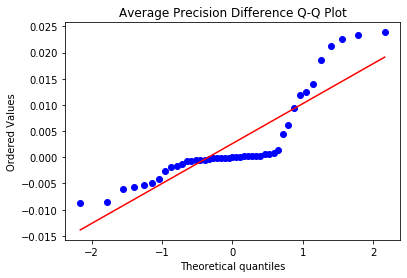

In [45]:
stats.probplot(results['difference_avg_prec'], plot= plt)
plt.title('Average Precision Difference Q-Q Plot')

In [46]:
stats.shapiro(results['difference_avg_prec'])

(0.7901073098182678, 1.4514598660753109e-06)

Hipoteza zerowa -> populacja ma rozkład normalny.
Hipoteza alternatynwna -> populacja nie ma rozkładu normalnego
Dla pvalue (0.0000014514598660753109) > alpha_level (0.05) hipoteza zerowa może zostać odrzucona. Dane nie mają rozkładu normalnego. Paired T-Test może więc być sfałszowany.
Paired Samples T-Test

In [47]:
stats.ttest_rel(results['batch_avg_prec'], results['stream_avg_prec'])

Ttest_relResult(statistic=2.115647407415726, pvalue=0.040070856120444885)

Hipoteza zerowa -> średnia różnica pomiędzy batch_roc_auc a stream_roc_auc jest równa 0.
Hipoteza alternatywna ->  średnia różnica pomiędzy batch_roc_auc a stream_roc_auc jest różna od 0.
Dla pvalue (0.040070856120444885) > alpha level (0.05) hipoteza zerowa nie może zostać odrzucona. Dane są więc statystycznie nieznaczące.

Wykorzystamy Wilcoxon Sign-Ranked Test, który nie ma wymagań dotyczących rozkładu populacji.

In [48]:
stats.wilcoxon(results['batch_avg_prec'], results['stream_avg_prec'])

WilcoxonResult(statistic=462.0, pvalue=0.5310138434457455)

Hipoteza zerowa -> średnia różnica pomiędzy batch_avg_prec i stream_avg_prec jest równa 0.
Hipoteza alternatywna ->  średnia różnica pomiędzy batch_avg_prec i stream_avg_prec jest różna od 0.
Dla pvalue(0.5310138434457455) > alpha level (0.05) hipoteza zerowa nie może zostać odrzucona. Dane są więc statystycznie nieznaczące.